In [71]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

data = {'Case': ['Pneumonia','COVID-19','Normal','Pneumonia','COVID-19','Normal'],
        'Dataset': ['Training', 'Training', 'Training', 'Validation', 'Validation', 'Validation'],
        'Count': [4273, 6534, 7151, 1000, 1432, 1000]
        }

df = pd.DataFrame(data, columns = ['Case','Dataset','Count'])

print (df)

        Case     Dataset  Count
0  Pneumonia    Training   4273
1   COVID-19    Training   6534
2     Normal    Training   7151
3  Pneumonia  Validation   1000
4   COVID-19  Validation   1432
5     Normal  Validation   1000


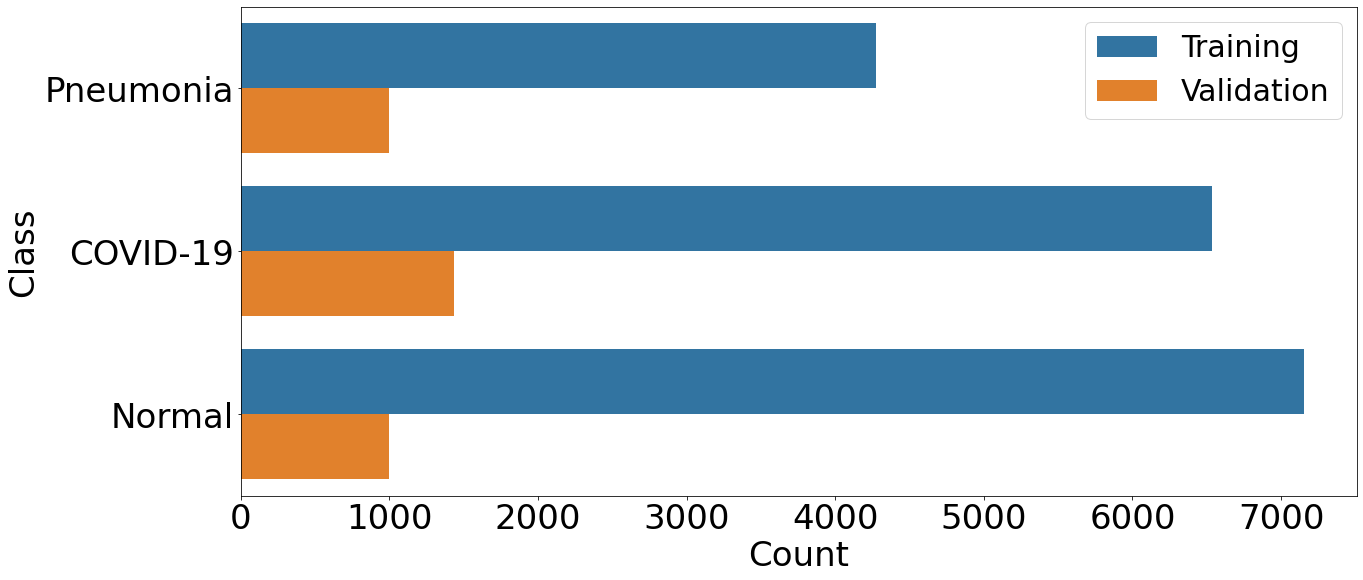

In [101]:
rcParams['figure.figsize'] = 20,9
rcParams['legend.fontsize'] = 30
rcParams['figure.facecolor'] = 'white'
ax = sns.barplot(x="Count", y="Case", hue="Dataset", data=df) 
ax.set_xlabel("Count", fontsize=34)
ax.set_ylabel("Class", fontsize=34)
ax.tick_params(labelsize=34)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[2:], labels=labels[2:])

In [102]:
plt = ax.get_figure()
plt.savefig("dataset_sizes.pdf", dpi=300, bbox_inches='tight')

### The following code is for the sensitivity graphs!

Json files are imported from the history data.. and stuff is processed.
_*To plot: Sensitivity vs precision*_
#### Remove the jittery stuff!
** Merge dataframe for sensitivity and precision **

In [6]:
import json
import glob
import pandas as pd

paths = glob.glob('../Comparison/history*.json')
files = {}
for i in range(len(paths)):
    try:
        files[i] = pd.read_json(paths[i])
    except Exception as e:
        print(e)
        
VGG16 = pd.read_json('../Comparison/100e_VGG_16_360x360_128-32-3_history.json')
VGG16 = VGG16[:-50] # This is a history of 100epochs. Removed the last 50 rows!

In [7]:
VGG16

,loss,accuracy,sensitivity,specificity,val_loss,val_accuracy,val_sensitivity,val_specificity
0,0.491019,0.795622,0.735907,0.937166,0.348517,0.874124,0.871203,0.939398
1,0.240857,0.915887,0.911375,0.959726,0.197305,0.929907,0.928738,0.966268
2,0.185559,0.935328,0.933656,0.968722,0.183918,0.932827,0.930491,0.967290
3,0.153422,0.947638,0.947081,0.974320,0.170652,0.937500,0.936624,0.969188
4,0.137564,0.949811,0.949309,0.975518,0.183315,0.938376,0.937500,0.969772
5,0.126066,0.954768,0.954100,0.977858,0.173421,0.938376,0.937500,0.970064
6,0.111106,0.959782,0.959336,0.980309,0.168323,0.948598,0.948014,0.974445
7,0.102544,0.965519,0.965185,0.982899,0.184416,0.943633,0.943633,0.971817
8,0.104366,0.965463,0.965352,0.982982,0.186296,0.945970,0.945093,0.972985
9,0.090444,0.969808,0.969641,0.984988,0.195694,0.942757,0.942465,0.971379


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_sensi = pd.DataFrame()
df_speci = pd.DataFrame()
df_loss = pd.DataFrame()
df_accu = pd.DataFrame()

df_sensi = df_sensi[0:0]
df_speci = df_speci[0:0]
df_loss = df_loss[0:0]
df_accu = df_accu[0:0]

for i in range(len(paths)):
    name = paths[i].split("_")[4].strip()
    target1 = 'val_sensitivity'
    target2 = 'val_specificity'
    target3 = 'val_loss'
    target4 = 'val_accuracy'
    col_sensi = name + '_' +target1
    col_speci = name + '_' +target2
    col_loss = name + '_' +target3
    col_preci = name + '_' +target4
    df_sensi[col_sensi] = files[i][target1]
    df_speci[col_speci] = files[i][target2]
    df_loss[col_loss] = files[i][target3]
    df_accu[col_preci] = files[i][target4]

In [22]:
df_sensi["VGG16_val_sensitivity"] = VGG16["val_sensitivity"]
df_speci["VGG16_val_specificity"] = VGG16["val_specificity"]
df_loss["VGG16_val_loss"] = VGG16["val_loss"]
df_accu["VGG16_val_accu"] = VGG16["val_accuracy"]

In [23]:
# Remove EfficientNetBx's for now!
df_sensi = df_sensi.drop(['EfficientNetB1_val_sensitivity', 'EfficientNetB7_val_sensitivity'], axis=1)
df_speci = df_speci.drop(['EfficientNetB1_val_specificity', 'EfficientNetB7_val_specificity'], axis=1)
df_loss = df_loss.drop(['EfficientNetB1_val_loss', 'EfficientNetB7_val_loss'], axis=1)
df_accu = df_accu.drop(['EfficientNetB1_val_accuracy', 'EfficientNetB7_val_accuracy'], axis=1)

In [24]:
df_loss

,DenseNet201_val_loss,InceptionResNetV2_val_loss,InceptionV3_val_loss,MobileNetV2_val_loss,NASNetLarge_val_loss,ResNet152V2_val_loss,Xception_val_loss,VGG16_val_loss
0,0.217417,0.179434,0.325250,1.993073,0.297918,1.345366,0.135276,0.348517
1,0.182927,0.175815,0.267357,1.724078,0.342793,0.234869,0.242029,0.197305
2,0.176679,0.182031,0.199280,1.119070,0.320008,0.321245,0.157819,0.183918
3,0.155101,0.224584,0.348327,2.686296,0.457916,0.189298,0.226970,0.170652
4,0.202666,0.159079,0.183791,0.407626,0.530751,0.244461,0.216536,0.183315
5,0.207640,0.221776,0.273431,0.469122,0.505260,0.648478,0.175348,0.173421
6,0.275795,0.191171,0.275989,0.889949,0.239551,0.297875,0.184250,0.168323
7,0.193366,0.206804,0.297763,0.530865,0.377016,0.199460,0.226798,0.184416
8,0.190584,0.188416,0.254845,0.553382,0.626395,0.357443,0.231630,0.186296
9,0.217083,0.198020,0.153865,0.301423,0.421640,0.720443,0.228015,0.195694


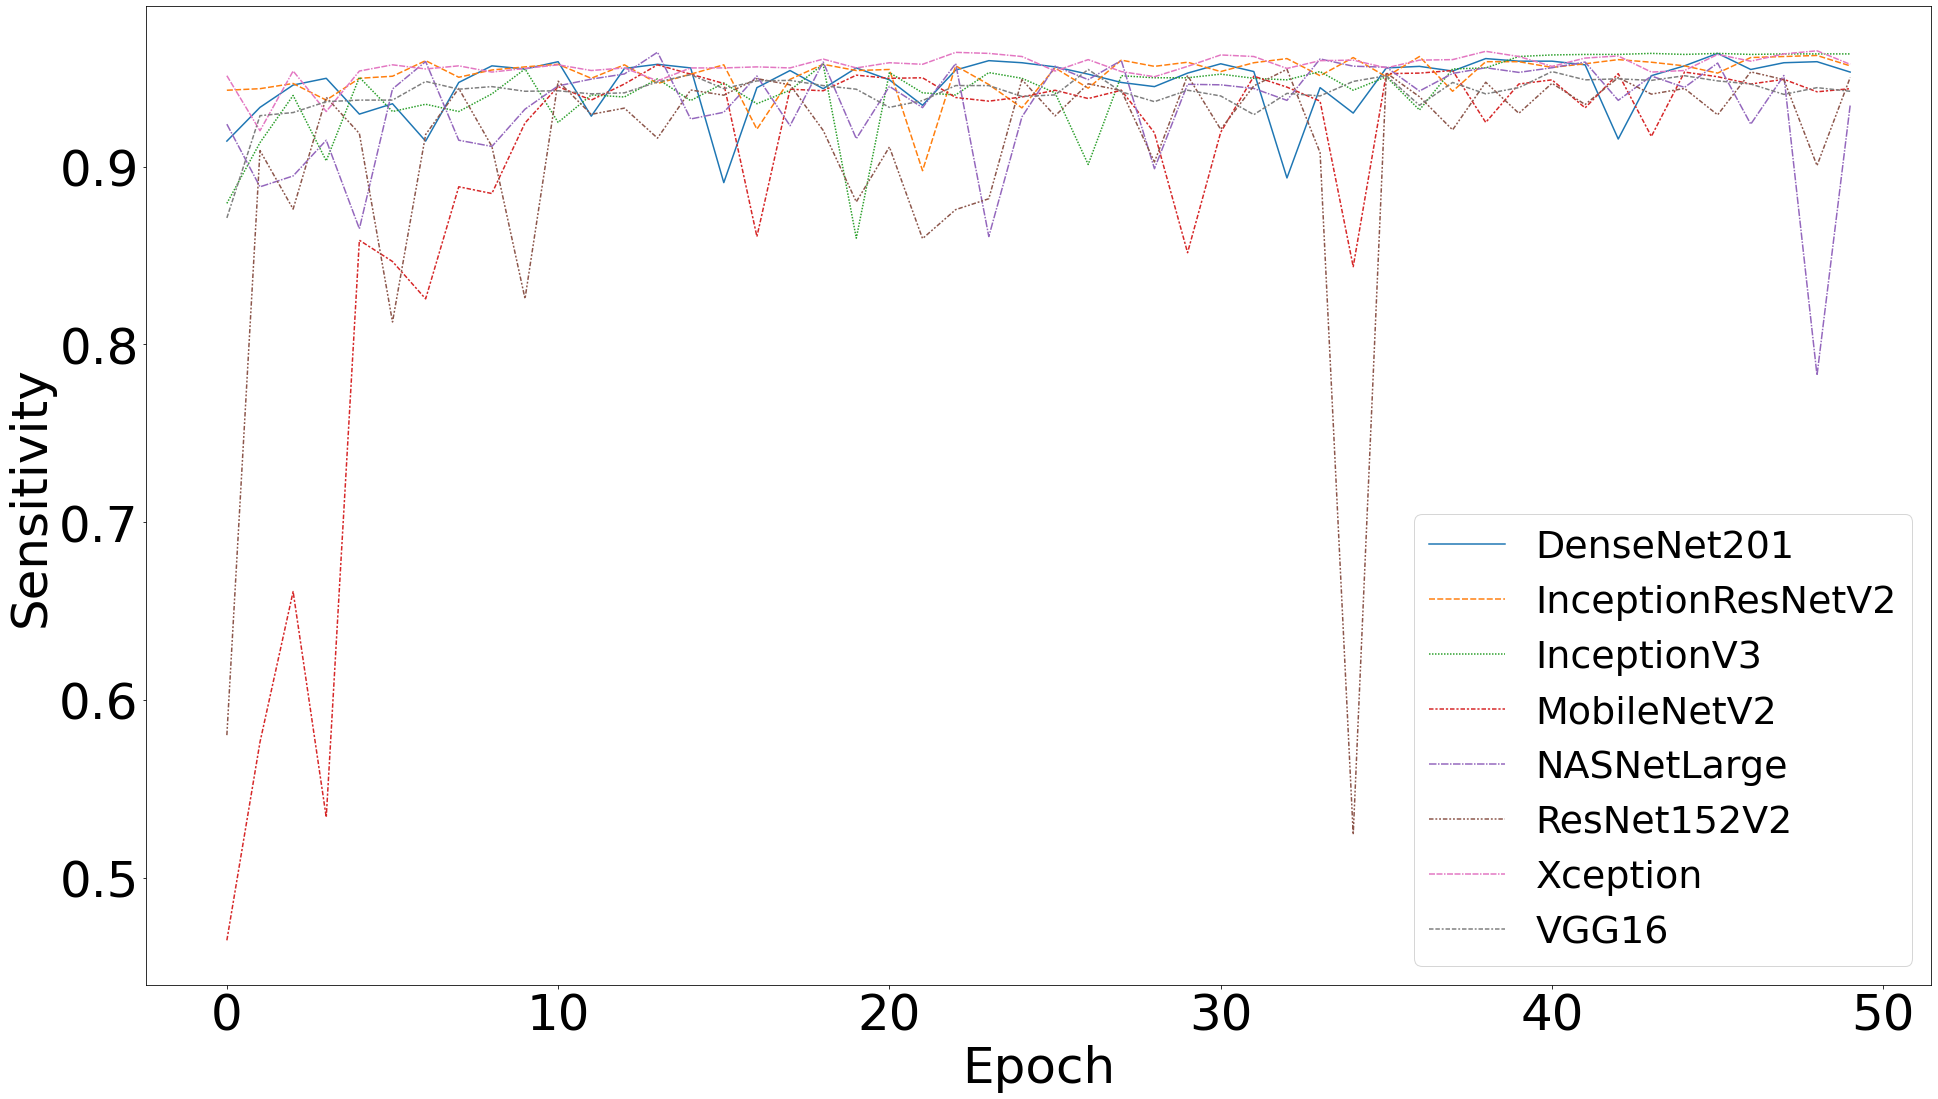

In [146]:
import seaborn as sns

rcParams['figure.figsize'] = 32,18
rcParams['legend.fontsize'] = 38
sns.color_palette('bright')

ax = sns.lineplot(data=df_sensi)

ax.set_xlabel('Epoch', fontsize=50)
ax.set_ylabel('Sensitivity', fontsize=50)
ax.tick_params(labelsize=50)

handles, labels1 = ax.get_legend_handles_labels()
for i in range(len(labels)):
    labels1[i] = labels1[i].split("_")[0].strip()
ax.legend(handles=handles[0:], labels=labels[0:])
#ax.legend(handles= handles, labels=labels1, loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(loc = 2, bbox_to_anchor = (1,1))

In [147]:
plt = ax.get_figure()
plt.savefig("sensitivity_graph.pdf", dpi=300, bbox_inches='tight')

In [109]:
labels[0].split("_")[0]

'DenseNet201'

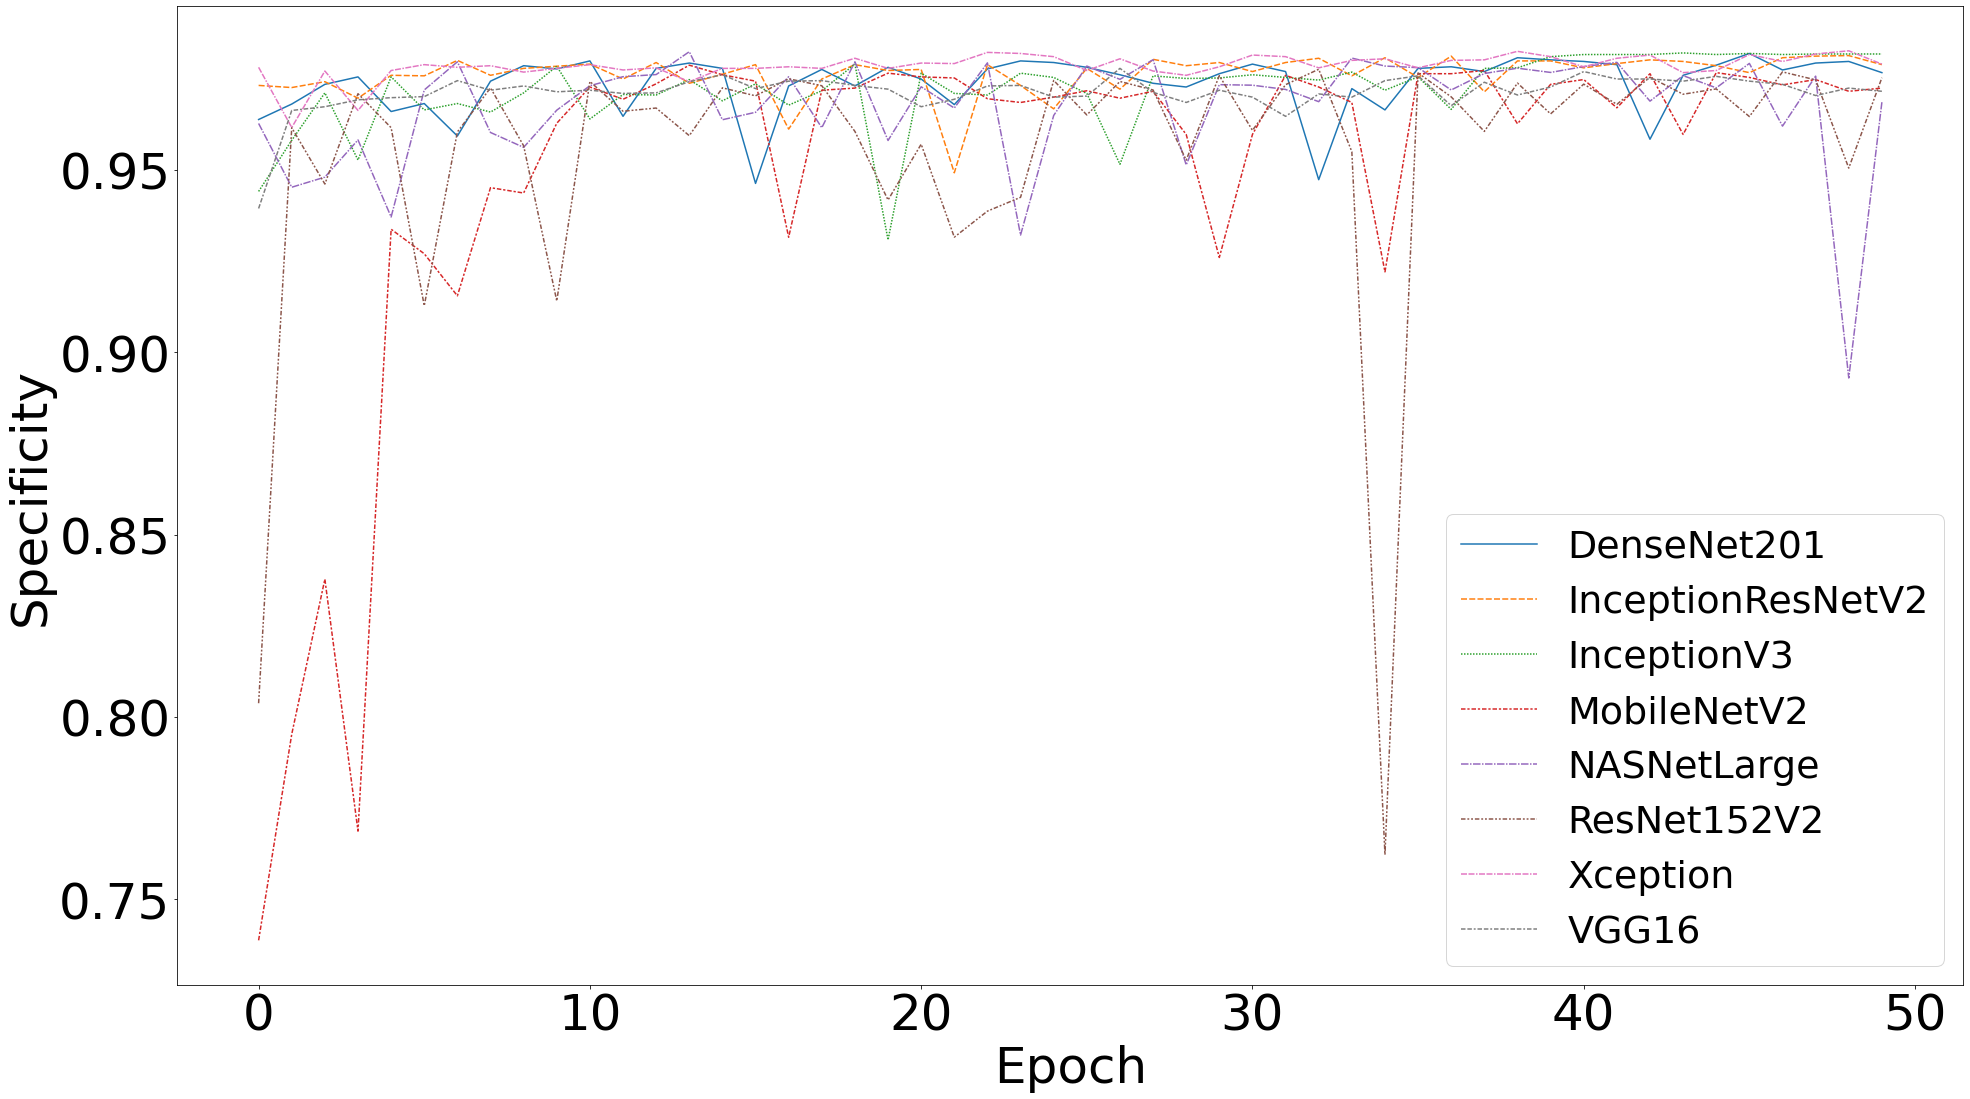

In [138]:
rcParams['figure.figsize'] = 32,18
rcParams['legend.fontsize'] = 38
sns.color_palette('bright')

ax = sns.lineplot(data=df_speci)

ax.set_xlabel('Epoch', fontsize=50)
ax.set_ylabel('Specificity', fontsize=50)
ax.tick_params(labelsize=50)

handles, labels1 = ax.get_legend_handles_labels()
for i in range(len(labels)):
    labels1[i] = labels1[i].split("_")[0].strip()
ax.legend(handles=handles[0:], labels=labels[0:])

In [139]:
plt = ax.get_figure()
plt.savefig("specificity_graph.pdf", dpi=300, bbox_inches='tight')

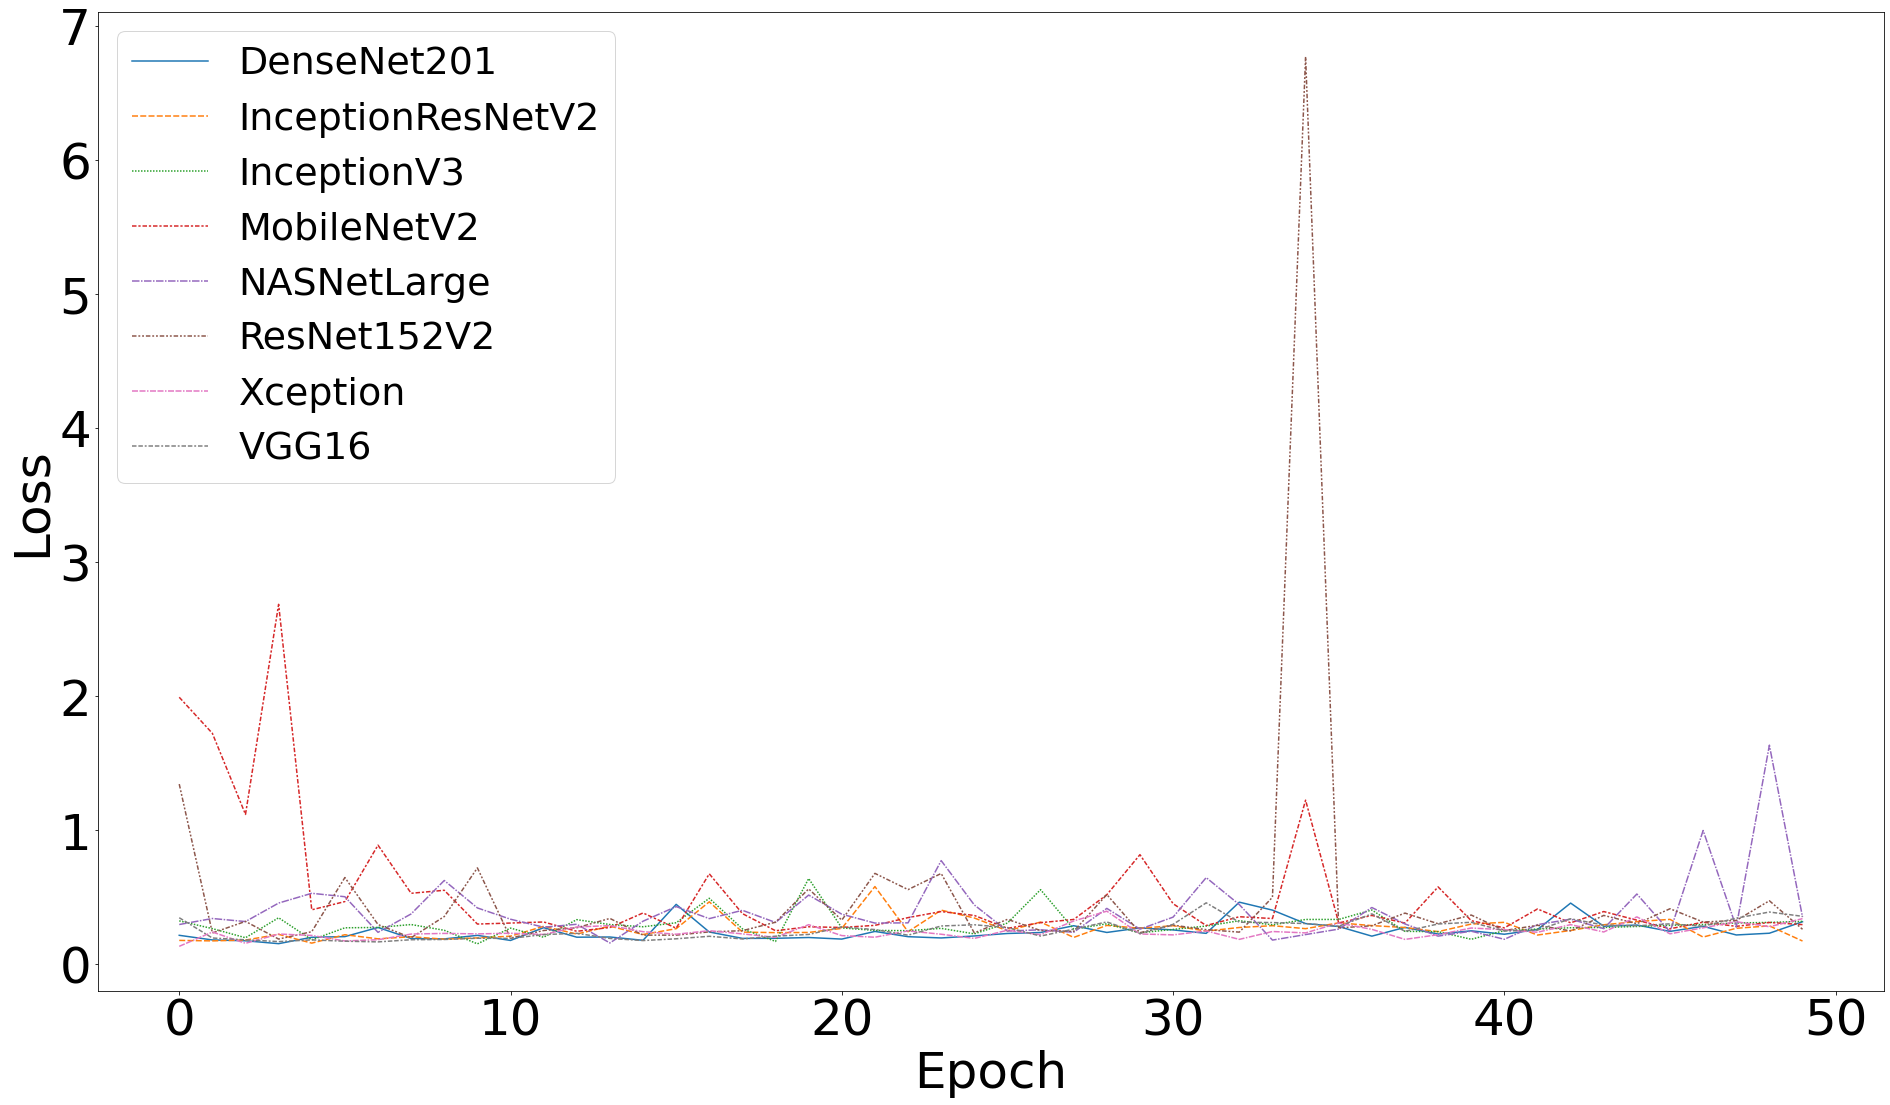

In [153]:
rcParams['figure.figsize'] = 32,18
rcParams['legend.fontsize'] = 38
sns.color_palette('bright')

ax = sns.lineplot(data=df_loss)

ax.set_xlabel('Epoch', fontsize=50)
ax.set_ylabel('Loss', fontsize=50)
ax.tick_params(labelsize=50)

handles, labels1 = ax.get_legend_handles_labels()
for i in range(len(labels)):
    labels1[i] = labels1[i].split("_")[0].strip()
ax.legend(handles=handles[0:], labels=labels[0:], loc = 'upper left')

plt = ax.get_figure()
plt.savefig("loss_graph.pdf", dpi=300, bbox_inches='tight')

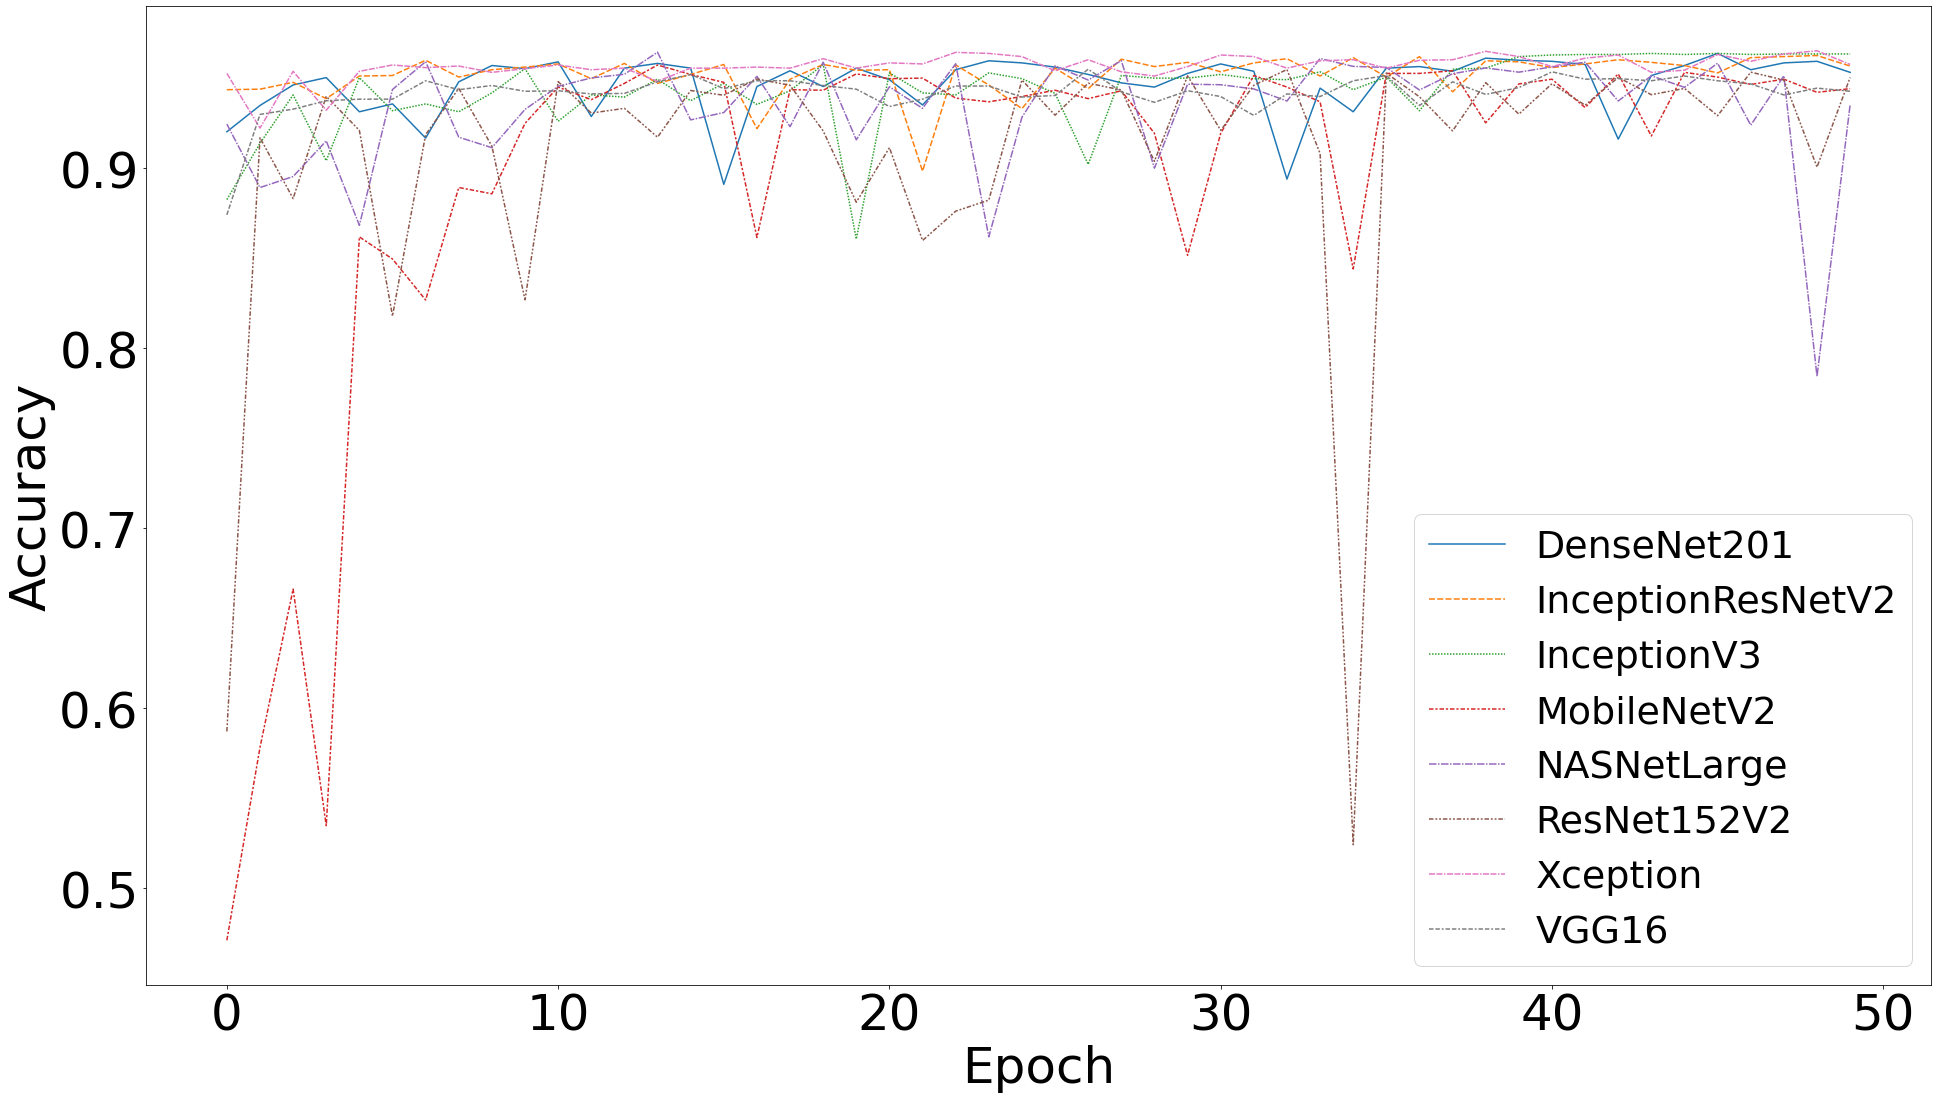

In [154]:
rcParams['figure.figsize'] = 32,18
rcParams['legend.fontsize'] = 38
sns.color_palette('bright')

ax = sns.lineplot(data=df_accu)

ax.set_xlabel('Epoch', fontsize=50)
ax.set_ylabel('Accuracy', fontsize=50)
ax.tick_params(labelsize=50)

handles, labels1 = ax.get_legend_handles_labels()
for i in range(len(labels)):
    labels1[i] = labels1[i].split("_")[0].strip()
ax.legend(handles=handles[0:], labels=labels[0:], loc = 'lower right')

plt = ax.get_figure()
plt.savefig("accu_graph.pdf", dpi=300, bbox_inches='tight')